In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Загрузка данных Амазона
df = pd.read_csv('exel_files/amazon_delivery.csv')

#Преобразование типов данных
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.time

#Обработка пропущенных значений
df.dropna(inplace=True)

## 1. Корреляционный анализ

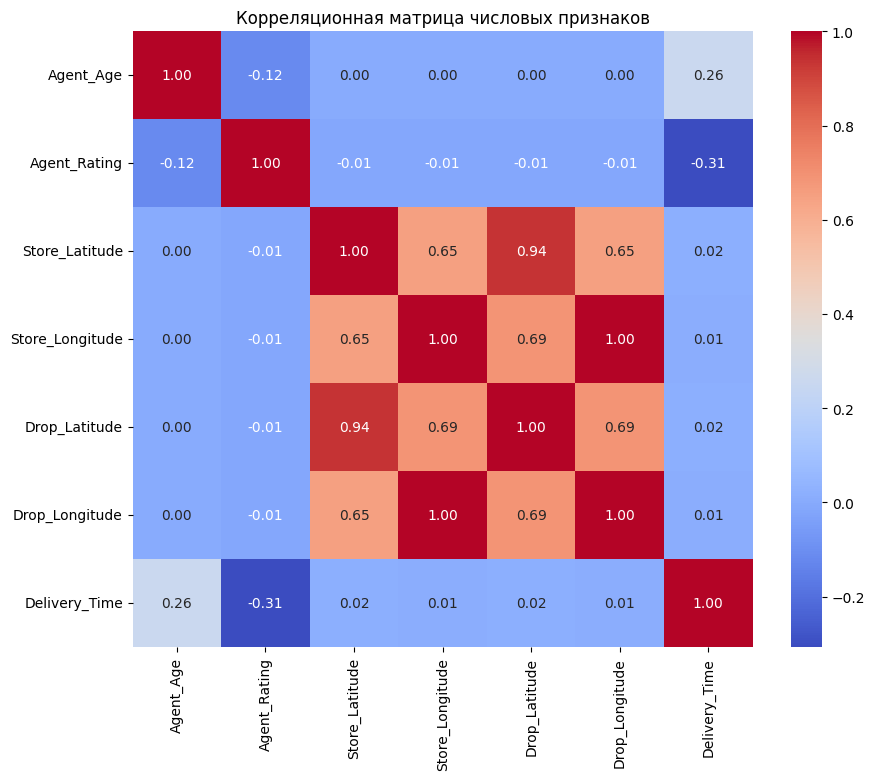

Корреляция с Delivery_Time:
Delivery_Time      1.000000
Agent_Age          0.258463
Drop_Latitude      0.017279
Store_Latitude     0.016890
Drop_Longitude     0.012287
Store_Longitude    0.011805
Agent_Rating      -0.307725
Name: Delivery_Time, dtype: float64


In [4]:
#Вычисление корреляционной матрицы для числовых признаков
numerical_features = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

print('Корреляция с Delivery_Time:')
print(correlation_matrix['Delivery_Time'].sort_values(ascending=False))

## 2. Влияние категориальных признаков на время доставки

### 2.1. Влияние категории товаров

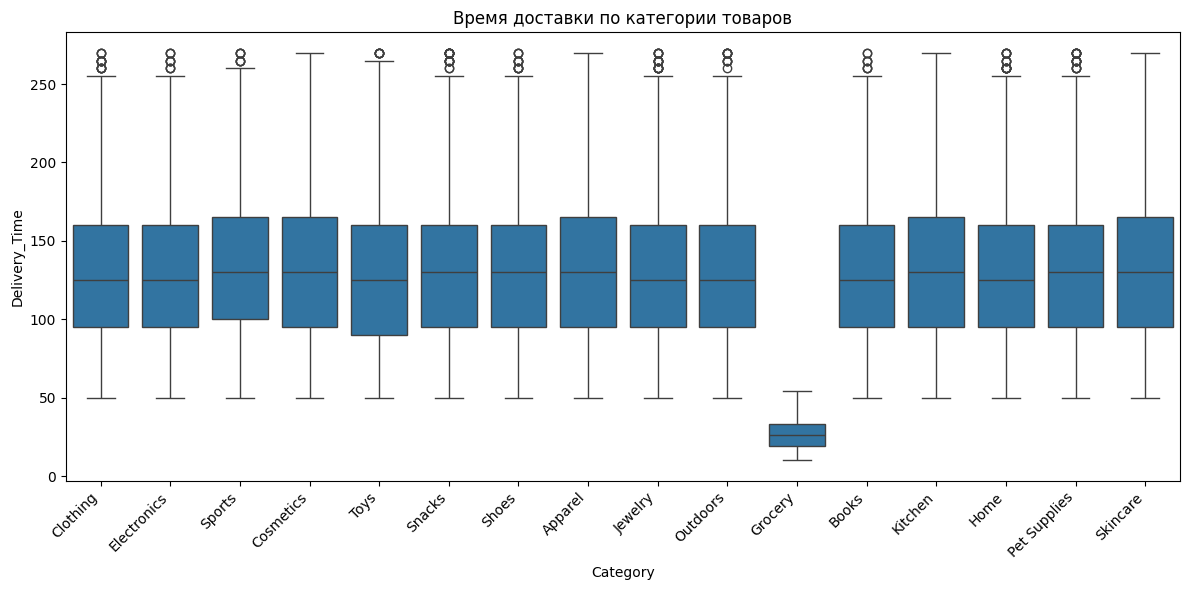

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Delivery_Time', data=df)
plt.title('Время доставки по категории товаров')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()